# Stock Market Analysis Project



dans ce projet, nous verrons les données sur les stocks de certaines entreprises.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={"figure.figsize":(16,9)} , font_scale=1.3, palette="Set1" , style='whitegrid' )

# Nous allons travailler avec les données de stock de Tesla, Ford et General Motors .


### Tesla

In [3]:
tesla = pd.read_csv("Tesla_Stock.csv")
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla.index = tesla.Date.values
tesla.head()

Date   Open   High    Low  Close   Volume
2012-01-03 2012-01-03  28.94  29.50  27.65  28.08   928052
2012-01-04 2012-01-04  28.21  28.67  27.50  27.71   630036
2012-01-05 2012-01-05  27.76  27.93  26.85  27.12  1005432
2012-01-06 2012-01-06  27.20  27.79  26.41  26.89   687081
2012-01-09 2012-01-09  27.00  27.49  26.12  27.25   896951

### Ford

In [4]:
ford = pd.read_csv("Ford_Stock.csv")
ford['Date'] = pd.to_datetime(ford['Date'])
ford.index = ford.Date.values
ford.head()

Date   Open   High    Low  Close    Volume
2012-01-03 2012-01-03  11.00  11.25  10.99  11.13  45709811
2012-01-04 2012-01-04  11.15  11.53  11.07  11.30  79725188
2012-01-05 2012-01-05  11.33  11.63  11.24  11.59  67877467
2012-01-06 2012-01-06  11.74  11.80  11.52  11.71  59840605
2012-01-09 2012-01-09  11.83  11.95  11.70  11.80  53981467

### GM

In [5]:
gm = pd.read_csv("GM_Stock.csv")
gm['Date'] = pd.to_datetime(gm['Date'])
gm.index = gm.Date.values
gm.head()

Date   Open   High    Low  Close    Volume
2012-01-03 2012-01-03  20.83  21.18  20.75  21.05   9321420
2012-01-04 2012-01-04  21.05  21.37  20.75  21.15   7856752
2012-01-05 2012-01-05  21.10  22.29  20.96  22.17  17884040
2012-01-06 2012-01-06  22.26  23.03  22.24  22.92  18234608
2012-01-09 2012-01-09  23.20  23.43  22.70  22.84  12091714

In [6]:
import cufflinks as cf

------------------

## Visualiser les données

### prix des stocks ouverts


In [7]:
teslao = tesla['Open']
gmo = gm['Open']
fordo = ford['Open']
Open = pd.concat([teslao ,fordo, gmo] , axis=1)
Open.columns = ['tesla','ford','gm']
Open.iplot(theme="white",colors=["red" , "blue" , "green"])

### Volume de stock négocié chaque jour

In [8]:
teslao = tesla['Volume']
gmo = gm['Volume']
fordo = ford['Volume']
Volume = pd.concat([teslao ,fordo, gmo] , axis=1)
Volume.columns = ['tesla','ford','gm']
Volume.iplot(theme="white",colors=["red" , "blue" , "green"])

In [9]:
print(ford['Volume'].max())
print(ford['Volume'].argmax())

220362796
2013-12-18 00:00:00


On dirait que Ford a eu une très forte hausse en 2013-12-18 avec un volume de 220 millions d'euros.
En savoir plus ici http://money.cnn.com/2013/12/18/news/companies/ford-profit/

____

## Maintenant, essayons de calculer combien d'argent échangé pour ces 3 entreprises

In [10]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

In [11]:
teslao = tesla['Total Traded']
gmo = gm['Total Traded']
fordo = ford['Total Traded']
Total = pd.concat([teslao , fordo, gmo ] , axis=1)
Total.columns=['Tesla','Ford','GM']

In [12]:
Total.iplot(theme='white',colors=["red" , "blue" , "green"])

In [13]:
print(tesla['Total Traded'].max())
print(tesla['Total Traded'].argmax())

7543310000.0
2014-02-25 00:00:00


**on dirait qu'il y avait une énorme quantité d'argent échangé pour Tesla (7.5 B) en 2014-02-25 ,**


**alors qu'est-ce qui s'est passé, c'est qu'une société de banque d'investissement appelée Morgan Stanley a donné un bon rapport sur Tesla**


En savoir plus ici https://money.cnn.com/2014/02/25/investing/tesla-record-high/

____

## Moyennes mobiles

In [14]:
gm.head()

Date   Open   High    Low  Close    Volume  Total Traded
2012-01-03 2012-01-03  20.83  21.18  20.75  21.05   9321420  1.941652e+08
2012-01-04 2012-01-04  21.05  21.37  20.75  21.15   7856752  1.653846e+08
2012-01-05 2012-01-05  21.10  22.29  20.96  22.17  17884040  3.773532e+08
2012-01-06 2012-01-06  22.26  23.03  22.24  22.92  18234608  4.059024e+08
2012-01-09 2012-01-09  23.20  23.43  22.70  22.84  12091714  2.805278e+08

In [15]:
gm['MA30'] = gm['Open'].rolling(30).mean()
gm['MA90'] = gm['Open'].rolling(90).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()

In [16]:
gm[['Open','MA30','MA90','MA200']].iplot(theme='white')

______

## relation entre ces stocks

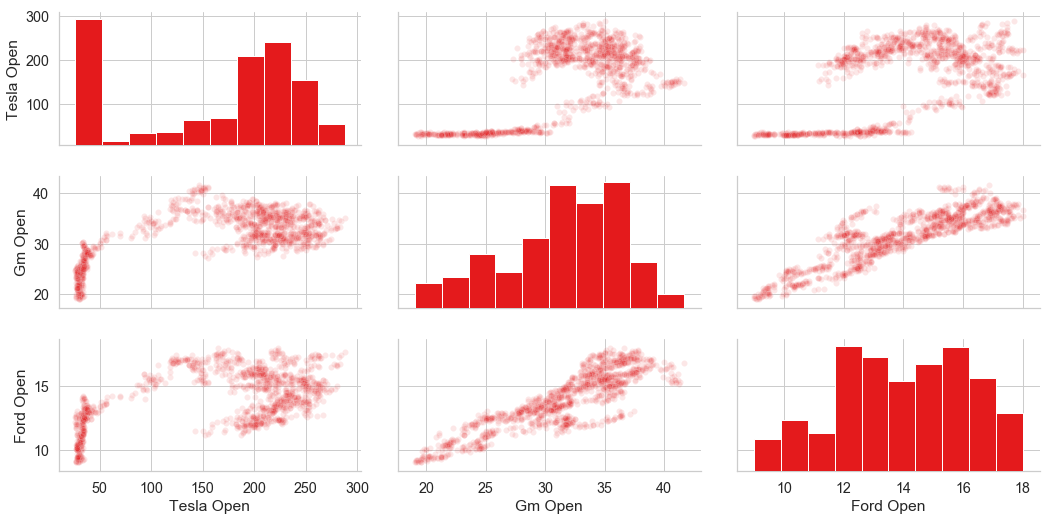

In [17]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']] , axis=1)
car_comp.columns = ['Tesla Open' , 'Gm Open' , 'Ford Open']
car_comp.dropna(inplace=True)
sns.pairplot(car_comp, plot_kws={'alpha':0.1}, aspect=2 )

In [18]:
car_comp.corr()

Tesla Open   Gm Open  Ford Open
Tesla Open    1.000000  0.677600   0.567922
Gm Open       0.677600  1.000000   0.867067
Ford Open     0.567922  0.867067   1.000000

**il semble que Ford et GM ont une forte corrélation**

_____
### OHLC

In [19]:
tesla.iplot(kind='ohlc',title='Tesla')

In [20]:
gm.iplot(kind='ohlc',title='GM')

In [21]:
ford.iplot(kind='ohlc',title='Ford')

-------------------
## Nous commencerons par calculer le pourcentage de changement quotidien.(retour)


$ r_t = \frac{p_t}{p_{t-1}} -1$

In [22]:
tesla['Returns'] = tesla['Close'].pct_change(1)
tesla.head()

Date   Open   High    Low  Close   Volume  Total Traded  \
2012-01-03 2012-01-03  28.94  29.50  27.65  28.08   928052   26857824.88   
2012-01-04 2012-01-04  28.21  28.67  27.50  27.71   630036   17773315.56   
2012-01-05 2012-01-05  27.76  27.93  26.85  27.12  1005432   27910792.32   
2012-01-06 2012-01-06  27.20  27.79  26.41  26.89   687081   18688603.20   
2012-01-09 2012-01-09  27.00  27.49  26.12  27.25   896951   24217677.00   

             Returns  
2012-01-03       NaN  
2012-01-04 -0.013177  
2012-01-05 -0.021292  
2012-01-06 -0.008481  
2012-01-09  0.013388

In [23]:
ford['Returns'] = ford['Close'].pct_change(1)
ford.head()

Date   Open   High    Low  Close    Volume  Total Traded  \
2012-01-03 2012-01-03  11.00  11.25  10.99  11.13  45709811  5.028079e+08   
2012-01-04 2012-01-04  11.15  11.53  11.07  11.30  79725188  8.889358e+08   
2012-01-05 2012-01-05  11.33  11.63  11.24  11.59  67877467  7.690517e+08   
2012-01-06 2012-01-06  11.74  11.80  11.52  11.71  59840605  7.025287e+08   
2012-01-09 2012-01-09  11.83  11.95  11.70  11.80  53981467  6.386008e+08   

             Returns  
2012-01-03       NaN  
2012-01-04  0.015274  
2012-01-05  0.025664  
2012-01-06  0.010354  
2012-01-09  0.007686

In [24]:
gm['Returns'] = gm['Close'].pct_change(1)
gm.head()

Date   Open   High    Low  Close    Volume  Total Traded  \
2012-01-03 2012-01-03  20.83  21.18  20.75  21.05   9321420  1.941652e+08   
2012-01-04 2012-01-04  21.05  21.37  20.75  21.15   7856752  1.653846e+08   
2012-01-05 2012-01-05  21.10  22.29  20.96  22.17  17884040  3.773532e+08   
2012-01-06 2012-01-06  22.26  23.03  22.24  22.92  18234608  4.059024e+08   
2012-01-09 2012-01-09  23.20  23.43  22.70  22.84  12091714  2.805278e+08   

            MA30  MA90  MA200   Returns  
2012-01-03   NaN   NaN    NaN       NaN  
2012-01-04   NaN   NaN    NaN  0.004751  
2012-01-05   NaN   NaN    NaN  0.048227  
2012-01-06   NaN   NaN    NaN  0.033829  
2012-01-09   NaN   NaN    NaN -0.003490

**Voyons comment la distribution de retour de stock d'une entreprise à d'autres**

Text(0.5,1,'Tesla')

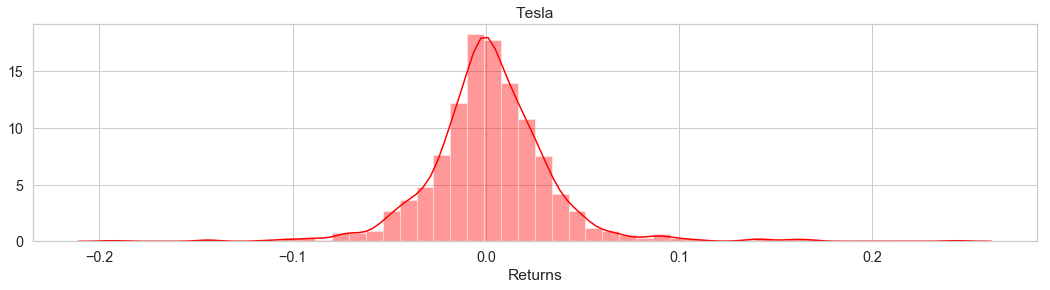

In [25]:
plt.figure(figsize=(18,4))
sns.distplot(tesla.Returns.dropna() ,color="red"  )
plt.title('Tesla')

Text(0.5,1,'Ford')

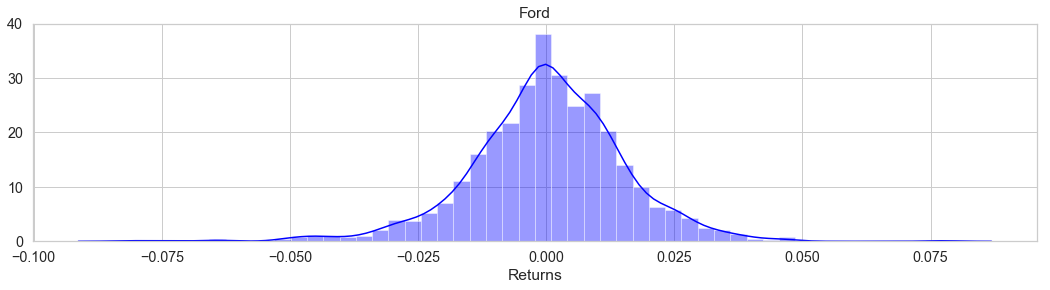

In [26]:
plt.figure(figsize=(18,4))
sns.distplot(ford.Returns.dropna() ,color="blue"  )
plt.title('Ford')

Text(0.5,1,'Gm')

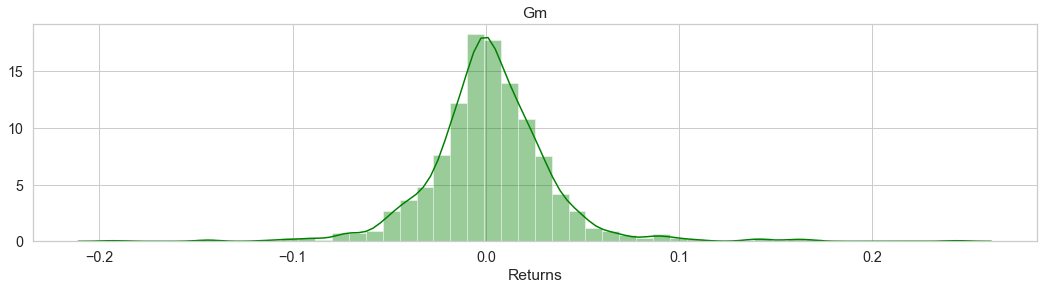

In [27]:
plt.figure(figsize=(18,4))
sns.distplot(tesla.Returns.dropna() ,color="green"  )
plt.title('Gm')

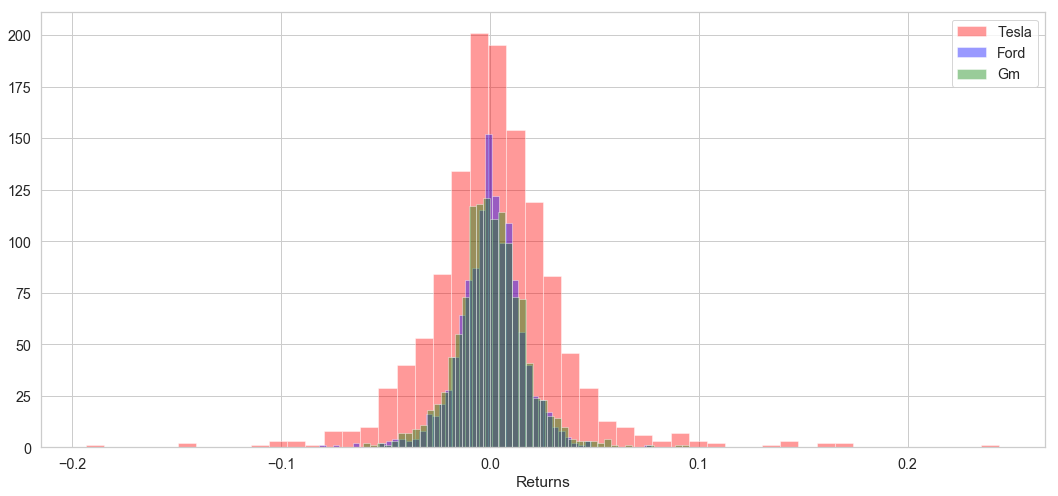

In [28]:
plt.figure(figsize=(18,8))
sns.distplot(tesla.Returns.dropna() ,color="red" ,label="Tesla" , kde=False  )
sns.distplot(ford.Returns.dropna() ,color="blue" ,label="Ford", kde=False  )
sns.distplot(gm.Returns.dropna() ,color="green" ,label="Gm" , kde=False  )
plt.legend()

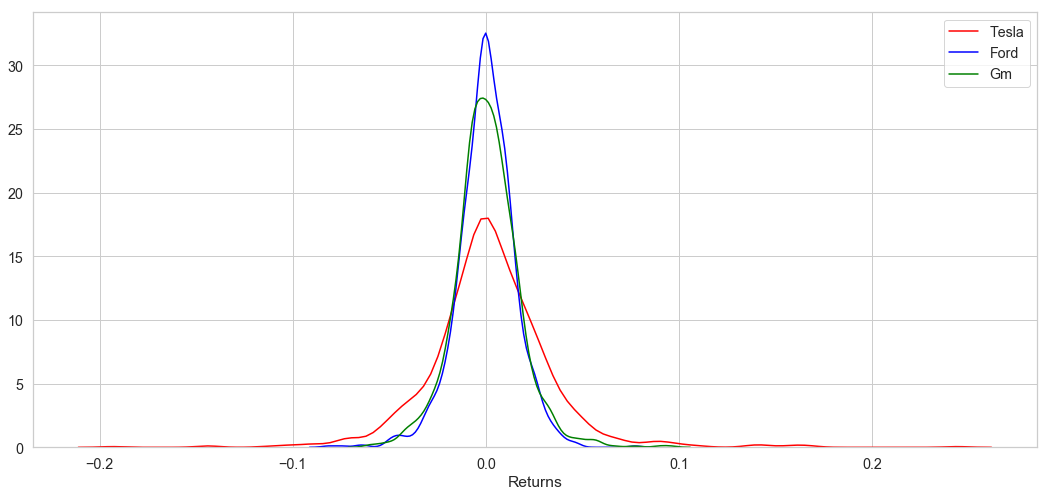

In [29]:
plt.figure(figsize=(18,8))
sns.distplot(tesla.Returns.dropna() ,color="red" ,label="Tesla" , hist=False  )
sns.distplot(ford.Returns.dropna() ,color="blue" ,label="Ford", hist=False  )
sns.distplot(gm.Returns.dropna() ,color="green" ,label="Gm" , hist=False  )

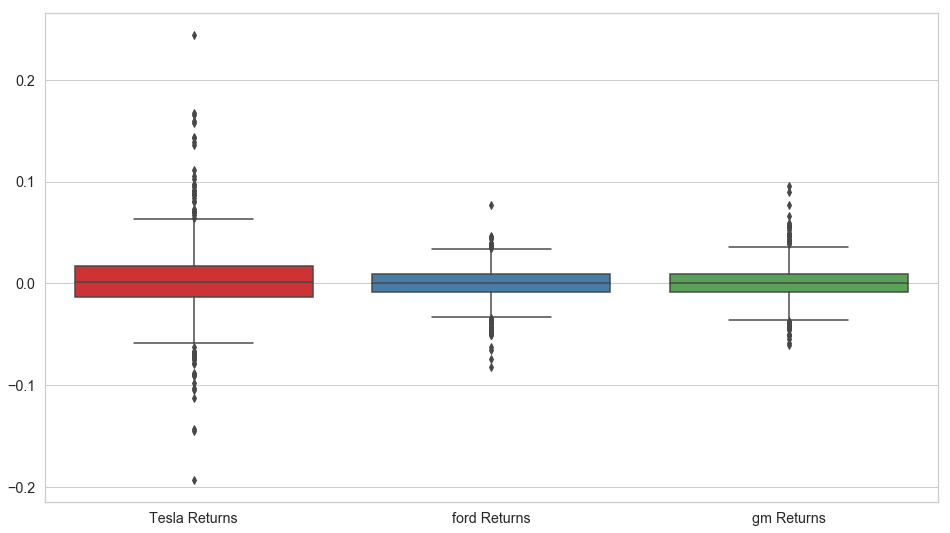

In [30]:
return_box = pd.concat([tesla['Returns'],ford['Returns'],gm['Returns']] , axis=1)
return_box.columns = ['Tesla Returns','ford Returns','gm Returns']
sns.boxplot(data=return_box )

## Comparer les rendements quotidiens entre les stocks

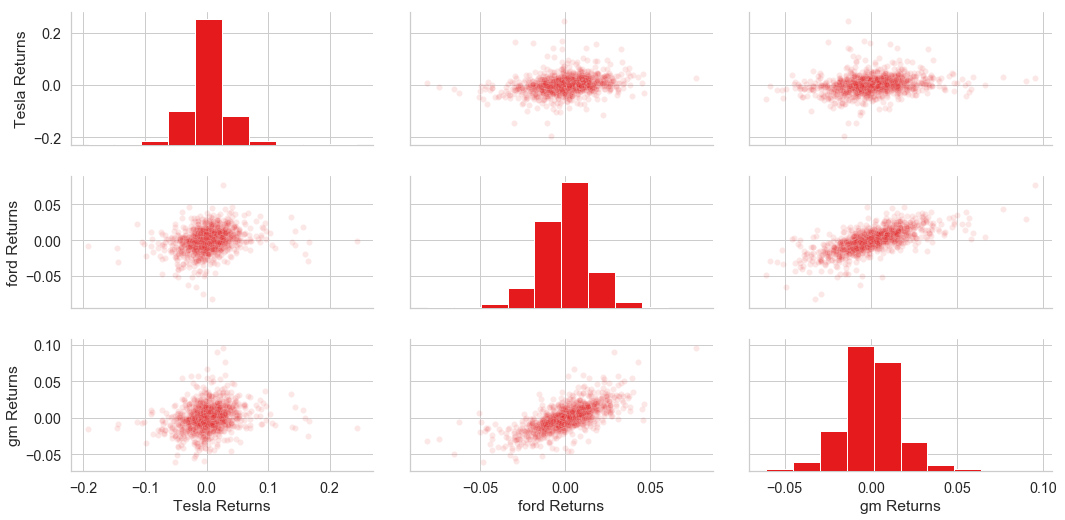

In [31]:
sns.pairplot(return_box.dropna(), plot_kws={'alpha':0.1}, aspect=2 )

In [32]:
return_box.corr()

Tesla Returns  ford Returns  gm Returns
Tesla Returns       1.000000      0.260314    0.220748
ford Returns        0.260314      1.000000    0.698392
gm Returns          0.220748      0.698392    1.000000

**On dirait que Ford et GM ont une sorte de relation,**

____
## Retours quotidiens cumulatifs

$ i_i = (1+r_t) * i_{t-1} $

In [33]:
tesla['Cumulative Return'] = (1+tesla['Returns']).cumprod()

In [34]:
tesla.head()

Date   Open   High    Low  Close   Volume  Total Traded  \
2012-01-03 2012-01-03  28.94  29.50  27.65  28.08   928052   26857824.88   
2012-01-04 2012-01-04  28.21  28.67  27.50  27.71   630036   17773315.56   
2012-01-05 2012-01-05  27.76  27.93  26.85  27.12  1005432   27910792.32   
2012-01-06 2012-01-06  27.20  27.79  26.41  26.89   687081   18688603.20   
2012-01-09 2012-01-09  27.00  27.49  26.12  27.25   896951   24217677.00   

             Returns  Cumulative Return  
2012-01-03       NaN                NaN  
2012-01-04 -0.013177           0.986823  
2012-01-05 -0.021292           0.965812  
2012-01-06 -0.008481           0.957621  
2012-01-09  0.013388           0.970442

In [35]:
ford['Cumulative Return'] = (1+ford['Returns']).cumprod()
gm['Cumulative Return'] = (1+gm['Returns']).cumprod()

** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

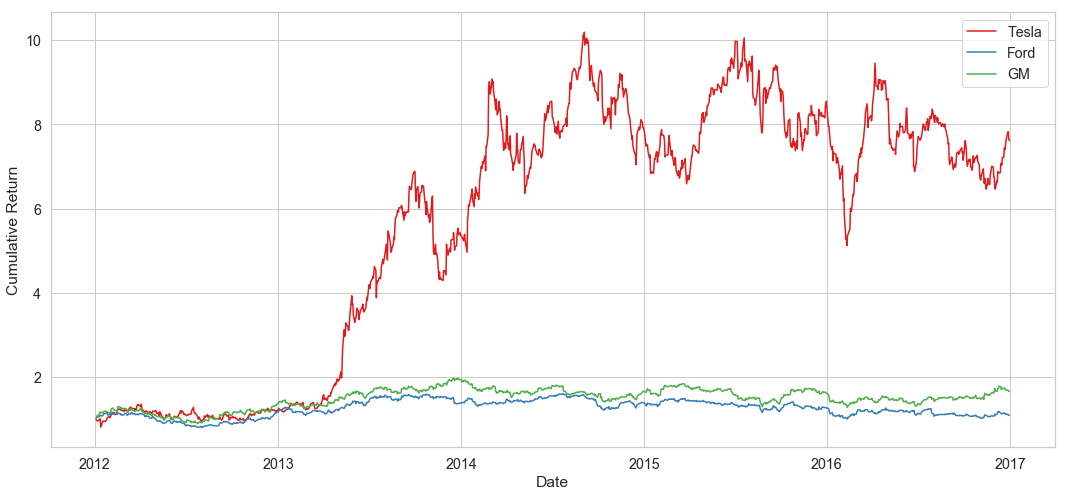

In [36]:
plt.figure(figsize=(18,8))
sns.lineplot(y=tesla['Cumulative Return'] , x=tesla['Date'] , label="Tesla")
sns.lineplot(y=ford['Cumulative Return'] , x=ford['Date'] , label="Ford")
sns.lineplot(y=gm['Cumulative Return'] , x=gm['Date'] , label="GM")

In [ ]:
df_cumulative = pd.concat([tesla['Cumulative Return'],ford['Cumulative Return'],gm['Cumulative Return']] , axis=1)
df_cumulative.columns = ["Tesla" , "Ford" , "GM"]
df_cumulative.iplot(colors=["red" , "blue" , "green"])